In [10]:
import math
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import cv2

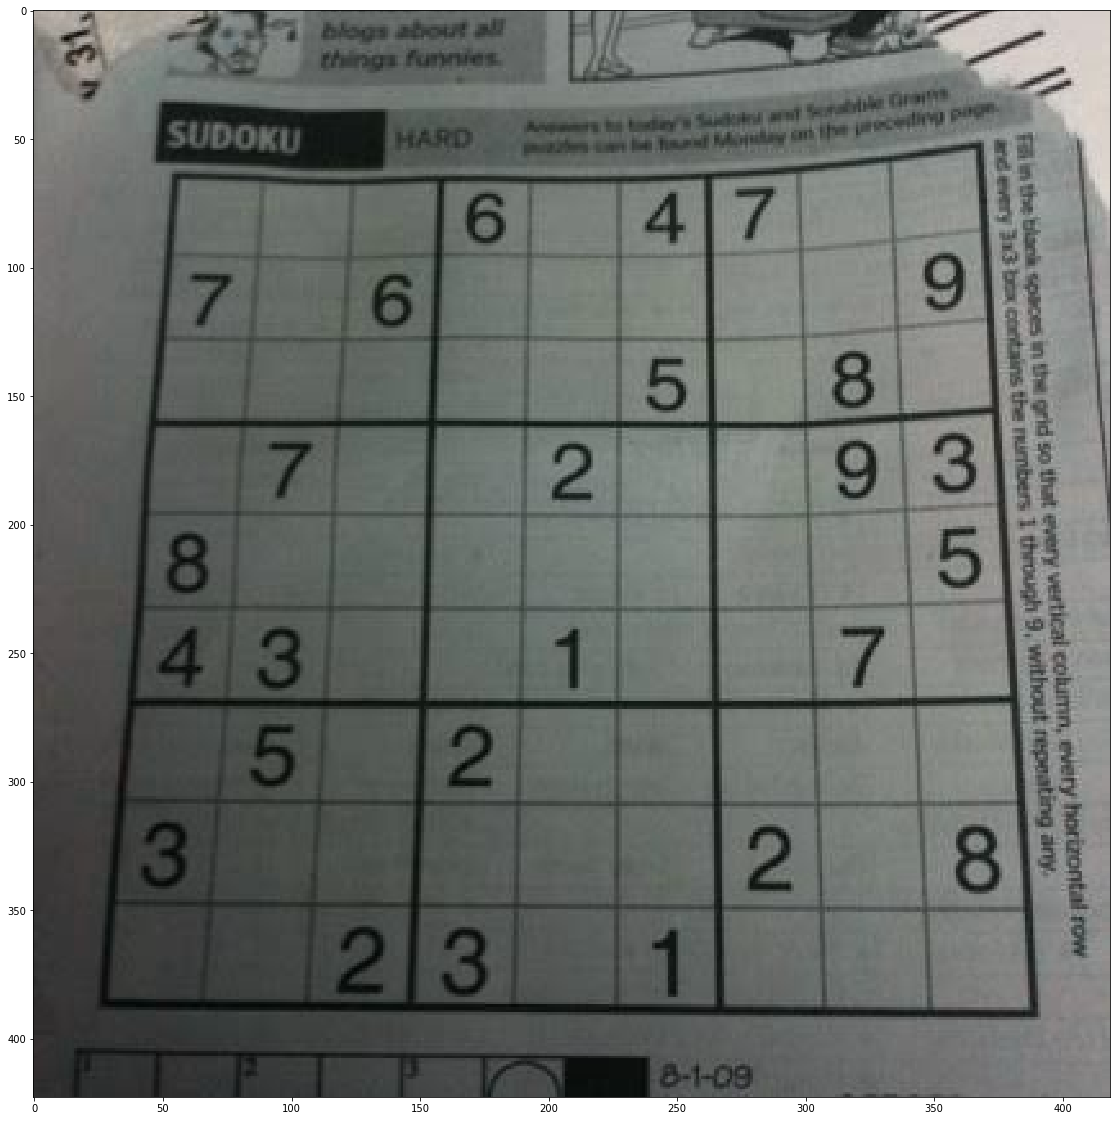

In [331]:
img = cv2.imread('pictures/test.jpeg')
plt.figure(figsize=(20, 20))
plt.imshow(img)

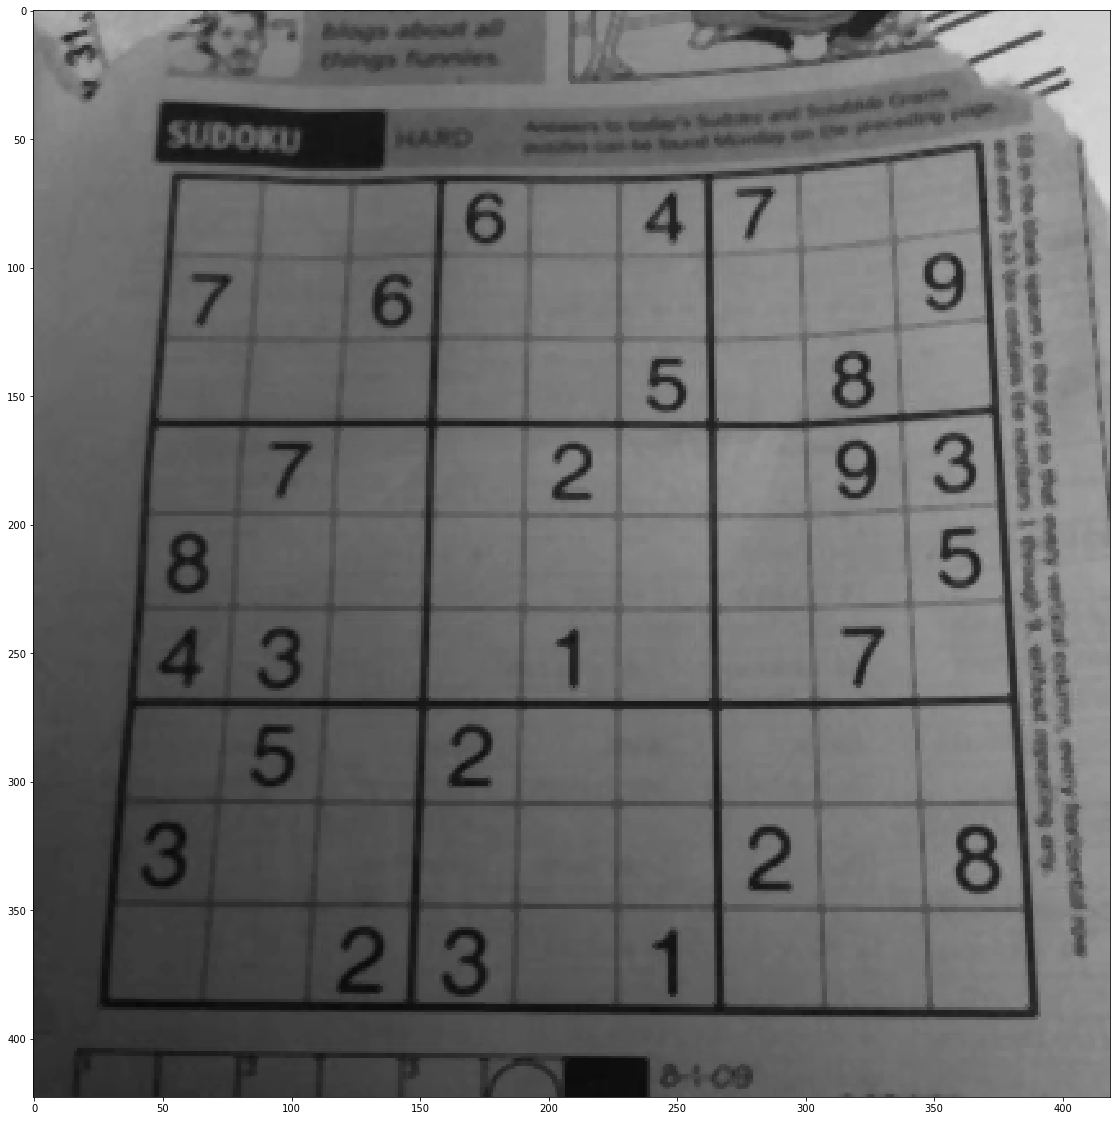

In [3]:
img = cv2.imread('pictures/test.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 3)
plt.figure(figsize=(20, 20))
plt.imshow(median, cmap='gray', vmin=0, vmax=255)

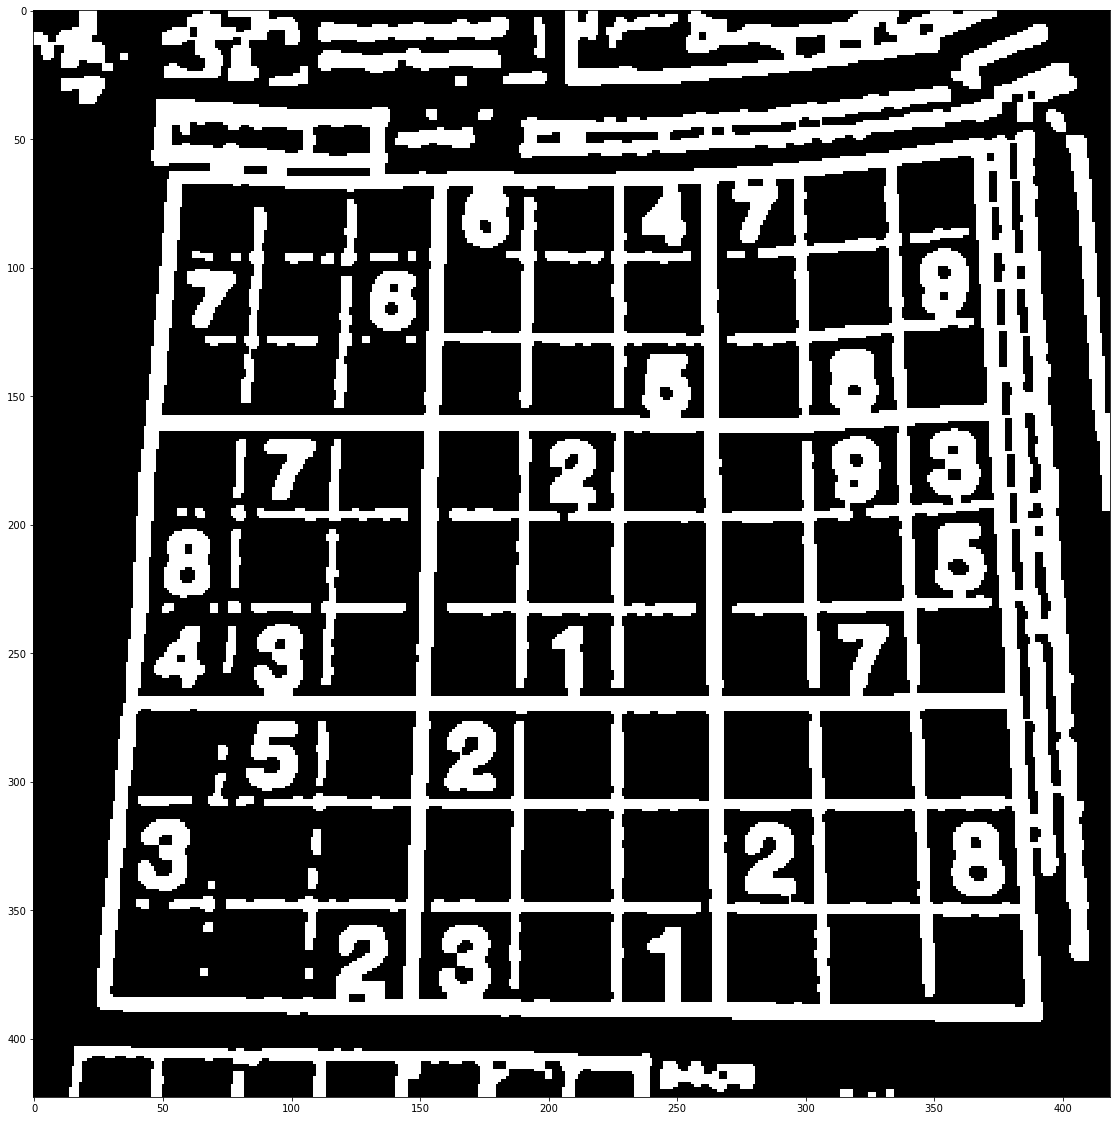

In [4]:
img = cv2.imread('pictures/test.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11, 11), 0)
threshold = cv2.adaptiveThreshold(
    blur, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    7,
    2)
inv = cv2.bitwise_not(threshold)
kernel = np.ones((5,5),np.uint8)
edges = cv2.dilate(inv, kernel)
kernel = np.ones((3,3),np.uint8)
edges = cv2.erode(edges, kernel)
plt.figure(figsize=(20, 20))
plt.imshow(edges, cmap='gray', vmin=0, vmax=255)

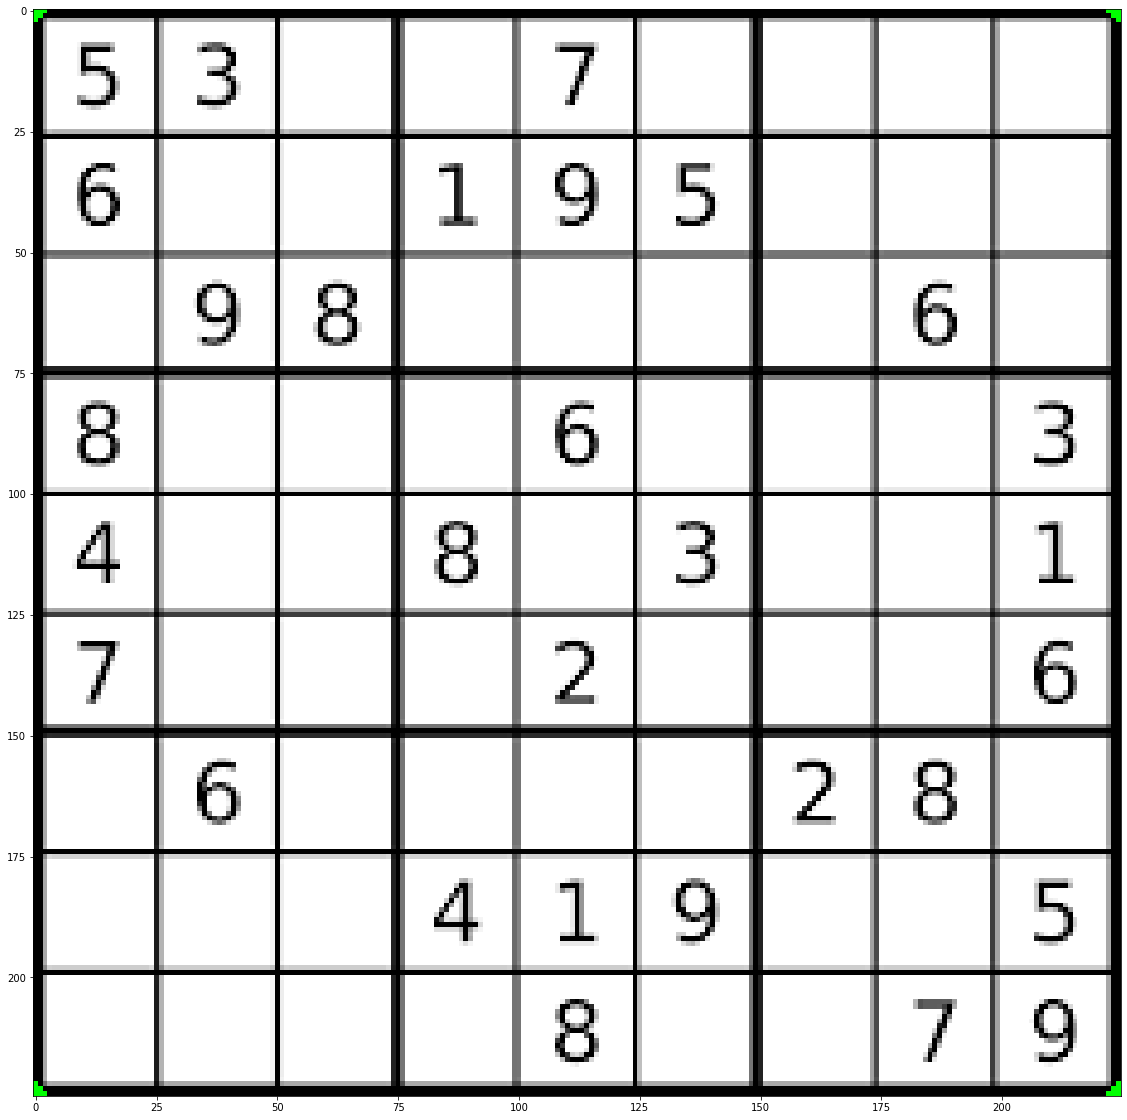

In [3]:

import cv2
import numpy as np

def perspective_transform(image, corners):
    def order_corner_points(corners):
        # Separate corners into individual points
        # Index 0 - top-right
        #       1 - top-left
        #       2 - bottom-left
        #       3 - bottom-right
        corners = [(corner[0][0], corner[0][1]) for corner in corners]
        top_r, top_l, bottom_l, bottom_r = corners[0], corners[1], corners[2], corners[3]
        return (top_l, top_r, bottom_r, bottom_l)

    # Order points in clockwise order
    ordered_corners = order_corner_points(corners)
    top_l, top_r, bottom_r, bottom_l = ordered_corners

    # Determine width of new image which is the max distance between 
    # (bottom right and bottom left) or (top right and top left) x-coordinates
    width_A = np.sqrt(((bottom_r[0] - bottom_l[0]) ** 2) + ((bottom_r[1] - bottom_l[1]) ** 2))
    width_B = np.sqrt(((top_r[0] - top_l[0]) ** 2) + ((top_r[1] - top_l[1]) ** 2))
    width = max(int(width_A), int(width_B))

    # Determine height of new image which is the max distance between 
    # (top right and bottom right) or (top left and bottom left) y-coordinates
    height_A = np.sqrt(((top_r[0] - bottom_r[0]) ** 2) + ((top_r[1] - bottom_r[1]) ** 2))
    height_B = np.sqrt(((top_l[0] - bottom_l[0]) ** 2) + ((top_l[1] - bottom_l[1]) ** 2))
    height = max(int(height_A), int(height_B))

    # Construct new points to obtain top-down view of image in 
    # top_r, top_l, bottom_l, bottom_r order
    dimensions = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], 
                    [0, height - 1]], dtype = "float32")

    # Convert to Numpy format
    ordered_corners = np.array(ordered_corners, dtype="float32")

    # Find perspective transform matrix
    matrix = cv2.getPerspectiveTransform(ordered_corners, dimensions)

    # Return the transformed image
    return cv2.warpPerspective(image, matrix, (width, height))

image = cv2.imread('pictures/test2.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 3)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,3)

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

with_count = cv2.drawContours(image, cnts[0], -1, (0,255,0), 3) 
plt.figure(figsize=(20, 20))
plt.imshow(with_count)


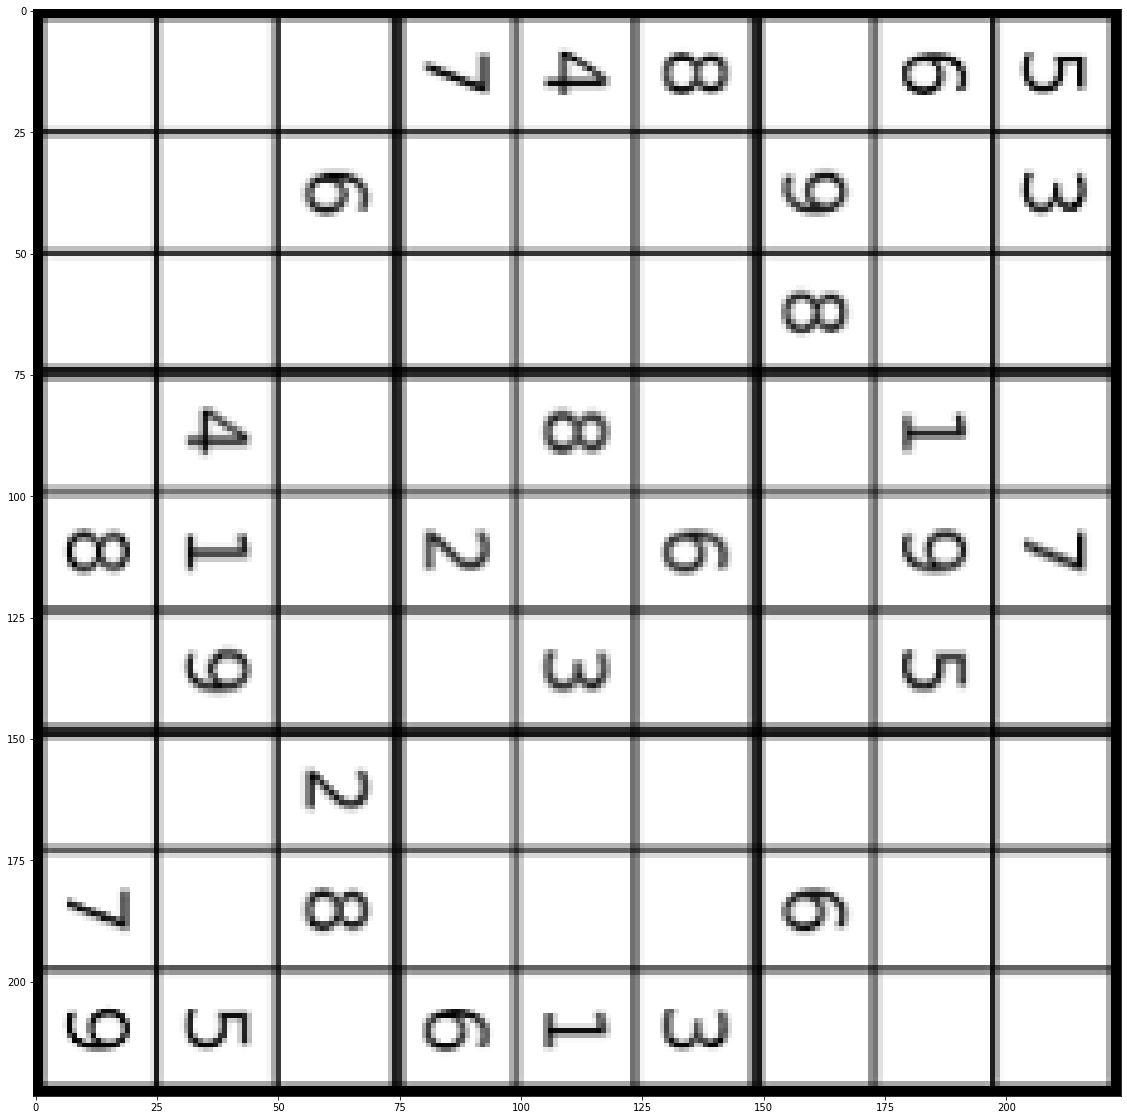

In [4]:
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)
    transformed = perspective_transform(original, approx)
    break

plt.figure(figsize=(20, 20))
plt.imshow(transformed, cmap='gray', vmin=0, vmax=255)

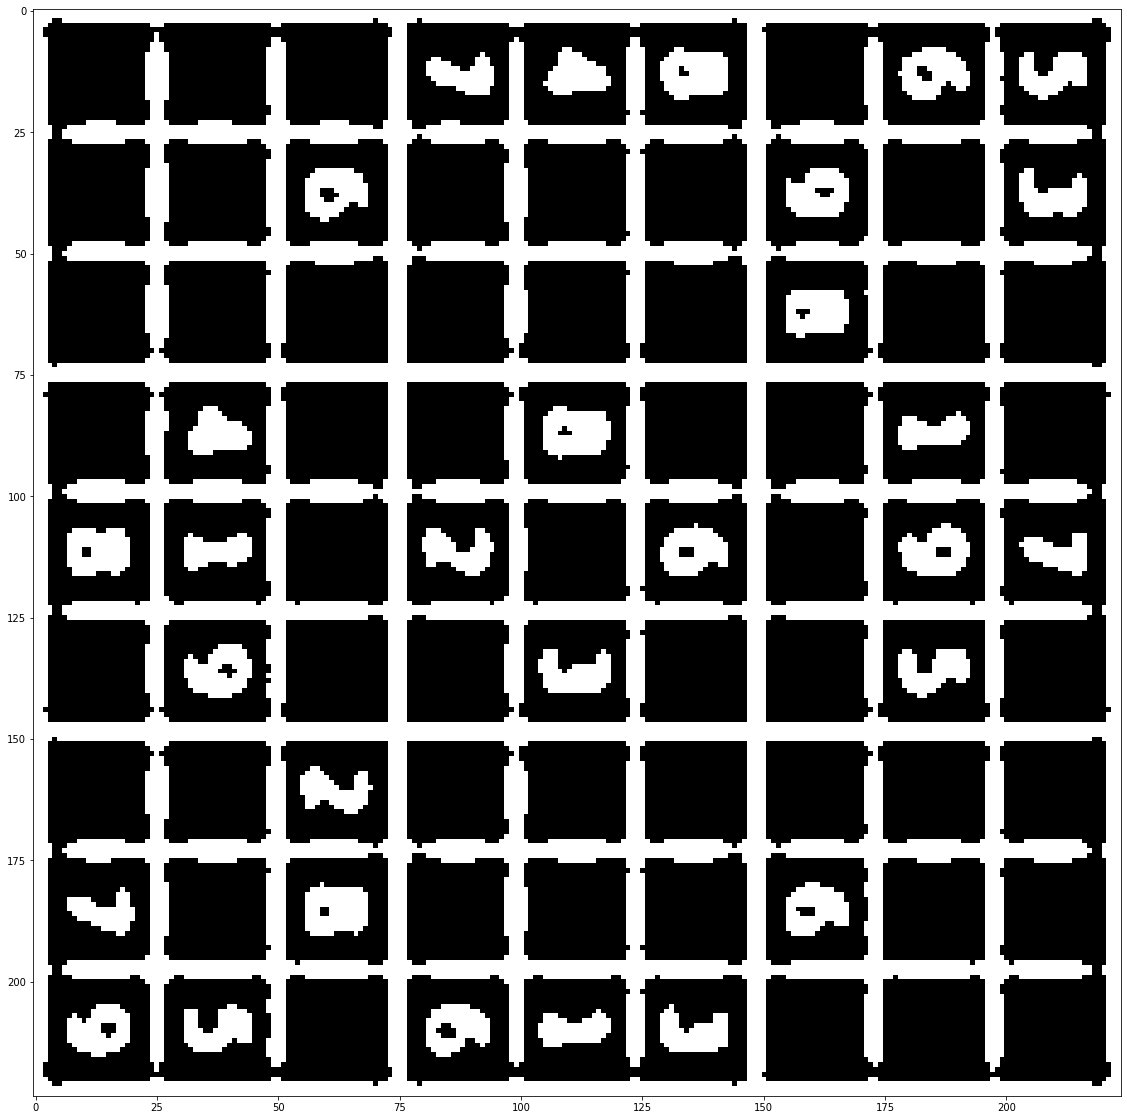

In [5]:
gray = cv2.cvtColor(transformed, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11, 11), 0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

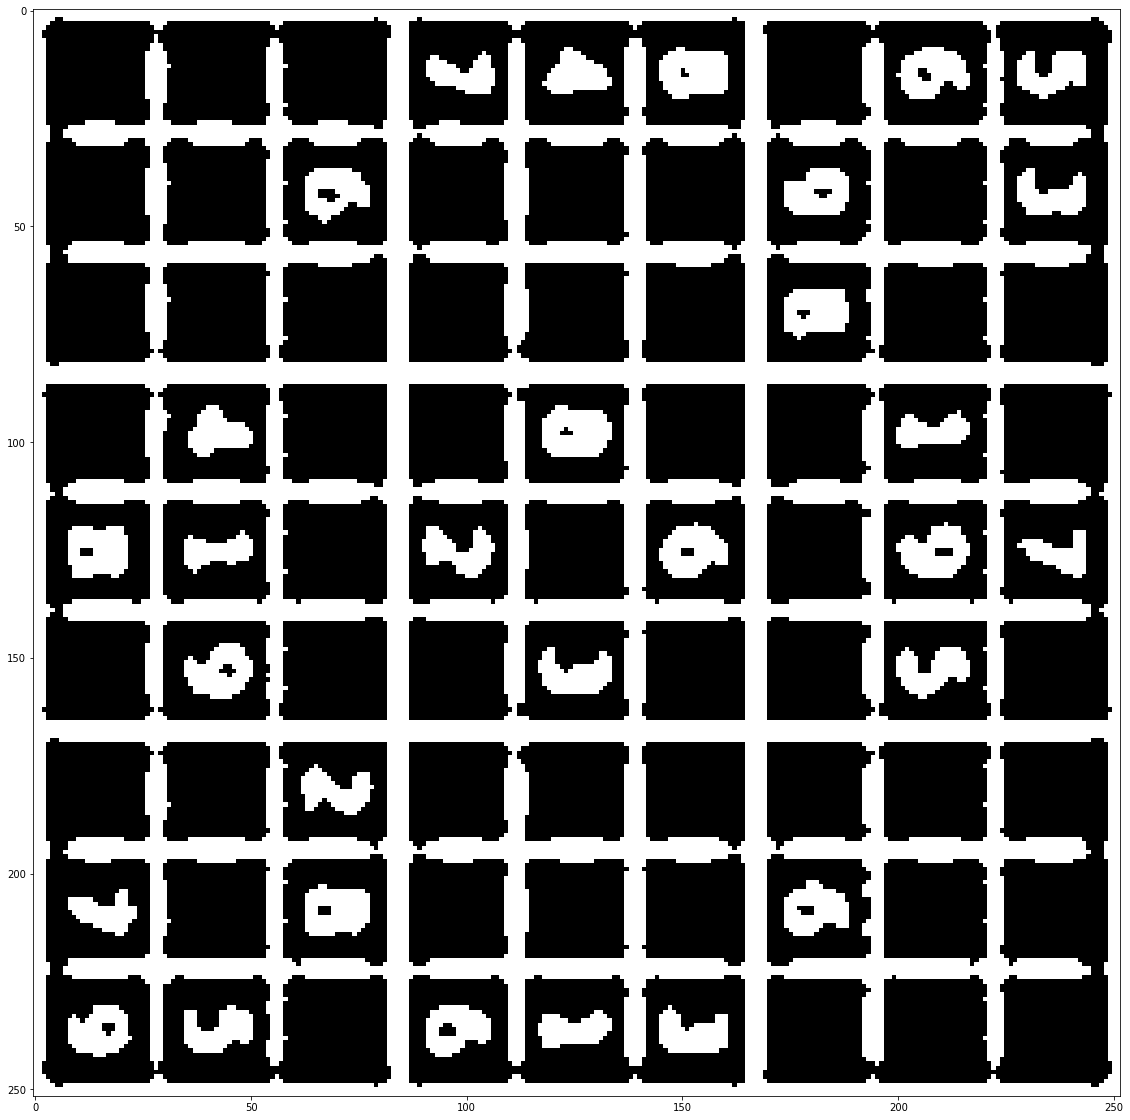

In [6]:
thresh = cv2.resize(thresh, (252, 252))
_, thresh = cv2.threshold(thresh,127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

In [203]:
# img = thresh.copy()
# # kernel = np.ones((9,9),np.uint8)
# # img = cv2.dilate(img, kernel)
# # kernel = np.ones((13,13),np.uint8)
# # img = cv2.erode(img, kernel)
# lines = cv2.HoughLines(img, 1, np.pi/180, 200)

# for line in lines:
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(img,(x1,y1),(x2,y2),(0,0,0),4)
# plt.figure(figsize=(20, 20))
# plt.imshow(img, cmap="gray")


In [204]:
# img2 = img.copy()
# lines = cv2.HoughLines(img, 1, np.pi/180, 150)

# for line in lines:
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(img2,(x1,y1),(x2,y2),(0,0,0),4)

# plt.figure(figsize=(20, 20))
# plt.imshow(img2, cmap="gray")

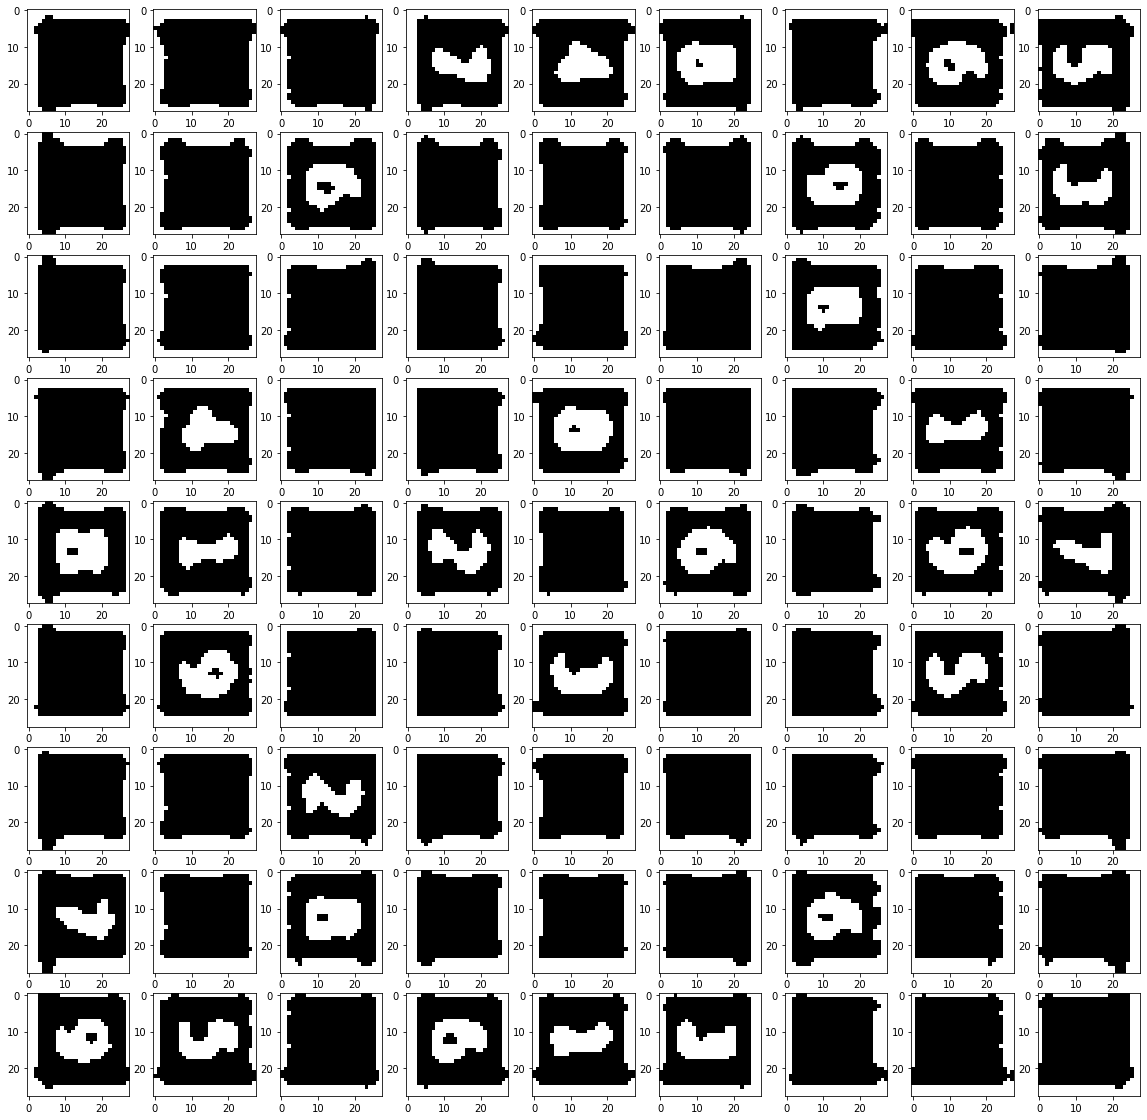

In [7]:
img = thresh.copy()
number_of_elem = 9
height, width = img.shape
delta_height, delta_width = math.floor(height / number_of_elem), math.floor(width / number_of_elem)
numbers_grid = []
for i in range(number_of_elem):
    row_grid = []
    for j in range(number_of_elem):
        number = img[ 
            i * delta_height: (i + 1) * delta_height,
            j * delta_width: (j + 1) * delta_width]
        row_grid.append(number)
    numbers_grid.append(row_grid)
    
_, ax = plt.subplots(nrows=9, ncols=9, figsize=(20, 20))
for i, row in enumerate(numbers_grid):
    for j, number in enumerate(row):
        ax[i, j].imshow(number, cmap='gray')

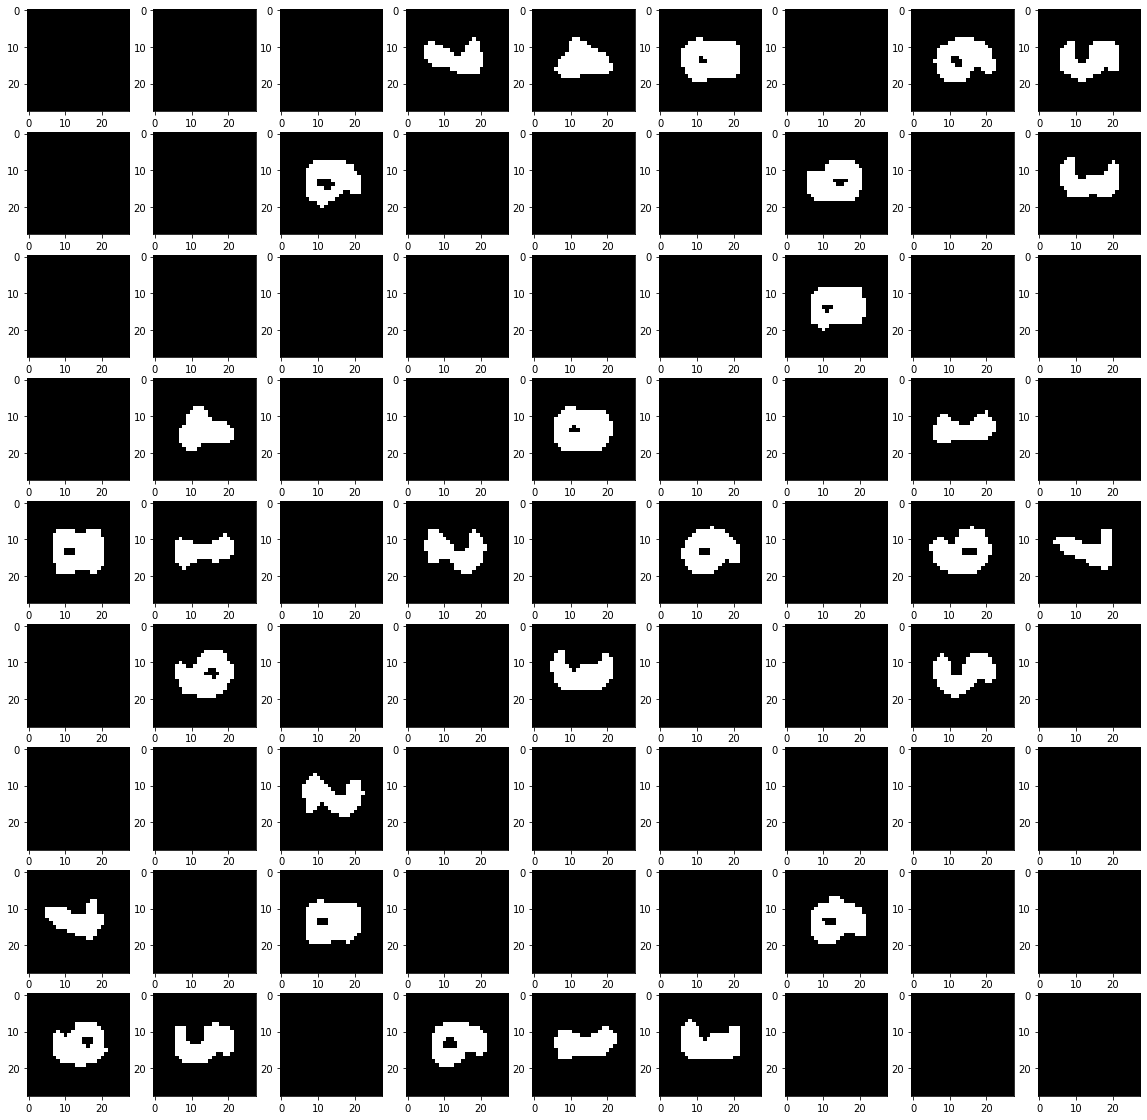

In [8]:
test_grid = []
for row in numbers_grid:
    row_grid = []
    for elem in row:
        for i in range(12, 18):
            for j in range(12, 18):
                if elem[i][j] == 255:
                    cv2.floodFill(elem, None, (j, i), 127)
        for i in range(28):
            for j in range(28):
                elem[i][j] = 255 if elem[i][j] == 127 else 0
        if (elem.mean() < 10):
            elem = np.zeros((28, 28))
        else: 
            cnts = cv2.findContours(elem, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = cnts[0] if len(cnts) == 2 else cnts[1]
            cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
            M = cv2.moments(cnts[0])
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            elem = np.roll(elem, 13 - cY, 0)
            elem = np.roll(elem, 13 - cX, 1)
        row_grid.append(elem)
    test_grid.append(row_grid)
    
_, ax = plt.subplots(nrows=9, ncols=9, figsize=(20, 20))
for i, row in enumerate(test_grid):
    for j, number in enumerate(row):
        ax[i, j].imshow(number, cmap='gray')

In [311]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
import pickle

In [305]:
mnist = datasets.fetch_openml('mnist_784', data_home='mnist_dataset/')

/home/happy-unicorn/anaconda3/lib/python3.7/site-packages/sklearn/datasets/openml.py:51: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [312]:
data, target = mnist.data, mnist.target
indices = np.random.choice(len(target), 70000, replace=False)

In [315]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [313]:
train_img = [data[i] for i in indices[:50000]]
train_img = np.array(train_img)
train_target = [target[i] for i in indices[:50000]]
train_target = np.array(train_target)

In [316]:
test_img = [data[i] for i in indices[60000:70000]]
test_img1 = np.array(test_img)
test_target = [target[i] for i in indices[60000:70000]]
test_target1 = np.array(test_target)
classifier.fit(train_img, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [318]:
y_pred = classifier.predict(test_img1)

In [319]:
print(classification_report(test_target1, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1001
           1       0.95      1.00      0.98      1060
           2       0.98      0.97      0.97       967
           3       0.96      0.96      0.96      1021
           4       0.98      0.98      0.98      1010
           5       0.96      0.98      0.97       901
           6       0.98      0.99      0.99       976
           7       0.96      0.97      0.97      1029
           8       0.99      0.93      0.96      1017
           9       0.96      0.97      0.97      1018

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [9]:
new_ar = []
for row in test_grid:
    new_row = []
    for elem in row:
        new_elem = elem.flatten()
        if new_elem.mean() < 10:
            new_row.append(0)
        else: 
            pred = classifier.predict(np.array([new_elem]))
            new_row.append(int(pred[0]))
    new_ar.append(new_row)

grid = np.array(new_ar)
grid

NameError: name 'classifier' is not defined

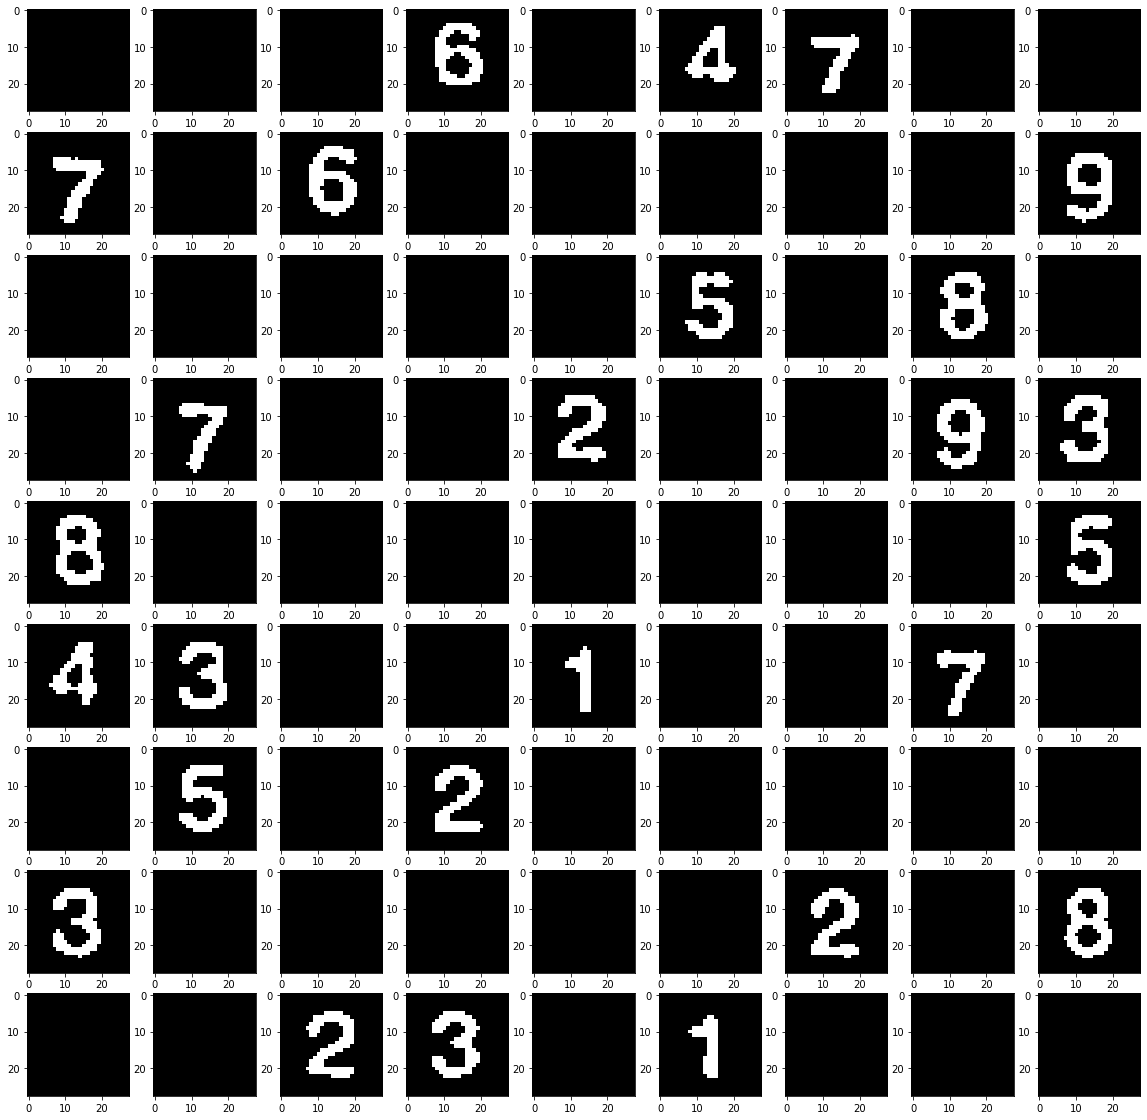

In [329]:
_, ax = plt.subplots(nrows=9, ncols=9, figsize=(20, 20))
for i, row in enumerate(test_grid):
    for j, number in enumerate(row):
        ax[i, j].imshow(number, cmap='gray')

In [330]:
board = new_ar


def solve(bo):
    find = find_empty(bo)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if valid(bo, i, (row, col)):
            bo[row][col] = i

            if solve(bo):
                return True

            bo[row][col] = 0

    return False


def valid(bo, num, pos):
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False

    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if bo[i][j] == num and (i,j) != pos:
                return False

    return True


def print_board(bo):
    for i in range(len(bo)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")

        for j in range(len(bo[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")

            if j == 8:
                print(bo[i][j])
            else:
                print(str(bo[i][j]) + " ", end="")


def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)  # row, col

    return None

print_board(board)
solve(board)
print("___________________")
print_board(board)

0 0 0  | 6 0 4  | 7 0 0
7 0 6  | 0 0 0  | 0 0 9
0 0 0  | 0 0 5  | 0 8 0
- - - - - - - - - - - - - 
0 7 0  | 0 2 0  | 0 9 3
8 0 0  | 0 0 0  | 0 0 5
4 3 0  | 0 1 0  | 0 7 0
- - - - - - - - - - - - - 
0 5 0  | 2 0 0  | 0 0 0
3 0 0  | 0 0 0  | 2 0 8
0 0 2  | 3 0 1  | 0 0 0
___________________
5 8 3  | 6 9 4  | 7 2 1
7 1 6  | 8 3 2  | 5 4 9
2 9 4  | 1 7 5  | 3 8 6
- - - - - - - - - - - - - 
6 7 1  | 5 2 8  | 4 9 3
8 2 9  | 7 4 3  | 1 6 5
4 3 5  | 9 1 6  | 8 7 2
- - - - - - - - - - - - - 
1 5 8  | 2 6 7  | 9 3 4
3 6 7  | 4 5 9  | 2 1 8
9 4 2  | 3 8 1  | 6 5 7


In [23]:
arr=[[0, 0, 0, 6, 0, 4, 7, 0, 0],
     [7, 0, 6, 0, 0, 0, 0, 0, 9],
     [0, 0, 0, 0, 0, 5, 0, 8, 0],
     [0, 7, 0, 0, 2, 0, 0, 9, 3],
     [8, 0, 0, 0, 0, 0, 0, 0, 5],
     [4, 3, 0, 0, 1, 0, 0, 7, 0],
     [0, 5, 0, 2, 0, 0, 0, 0, 0],
     [3, 0, 0, 0, 0, 0, 2, 0, 8],
     [0, 0, 2, 3, 0, 1, 0, 0, 0]]

In [24]:
class SudokuSolverService:
    @staticmethod
    def solve(bo):
        find = SudokuSolverService.find_empty(bo)
        if not find:
            return True
        else:
            row, col = find

        for i in range(1, 10):
            if SudokuSolverService.is_valid(bo, i, (row, col)):
                bo[row][col] = i

                if SudokuSolverService.solve(bo):
                    return True

                bo[row][col] = 0

        return False

    @staticmethod
    def is_valid(bo, num, pos):
        for i in range(len(bo[0])):
            if bo[pos[0]][i] == num and pos[1] != i:
                return False

        for i in range(len(bo)):
            if bo[i][pos[1]] == num and pos[0] != i:
                return False

        box_x = pos[1] // 3
        box_y = pos[0] // 3

        for i in range(box_y * 3, box_y * 3 + 3):
            for j in range(box_x * 3, box_x * 3 + 3):
                if bo[i][j] == num and (i, j) != pos:
                    return False

        return True

    @staticmethod
    def find_empty(bo):
        for i in range(len(bo)):
            for j in range(len(bo[0])):
                if bo[i][j] == 0:
                    return (i, j)

        return None

SudokuSolverService.solve(arr)

True

In [25]:
arr

[[5, 8, 3, 6, 9, 4, 7, 2, 1],
 [7, 1, 6, 8, 3, 2, 5, 4, 9],
 [2, 9, 4, 1, 7, 5, 3, 8, 6],
 [6, 7, 1, 5, 2, 8, 4, 9, 3],
 [8, 2, 9, 7, 4, 3, 1, 6, 5],
 [4, 3, 5, 9, 1, 6, 8, 7, 2],
 [1, 5, 8, 2, 6, 7, 9, 3, 4],
 [3, 6, 7, 4, 5, 9, 2, 1, 8],
 [9, 4, 2, 3, 8, 1, 6, 5, 7]]

In [17]:
import numpy as np
import cv2


class PreImageService:
    def __init__(self, file):
        self.__image = self.__load(file)
        self.__original_image = self.__image.copy()

    def pre_numbers(self):
        self.__filters()
        self.__get_contours()
        self.__transformed_filters()
        self.__resize()
        print(self.__image)
        return self.__image

    def __load(self, file):
        return cv2.imread('pictures/test.jpeg')#cv2.imdecode(np.fromstring(file, np.uint8), cv2.IMREAD_UNCHANGED)

    def __resize(self):
        self.__image = cv2.resize(self.__image, (252, 252))
        self.__image = cv2.threshold(self.__image, 127, 255, cv2.THRESH_BINARY)[1]

    def __filters(self):
        self.__image = cv2.cvtColor(self.__image, cv2.COLOR_BGR2GRAY)
        self.__image = cv2.medianBlur(self.__image, 3)
        self.__image = cv2.adaptiveThreshold(self.__image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)

    def __transformed_filters(self):
        self.__image = cv2.cvtColor(self.__image, cv2.COLOR_BGR2GRAY)
        self.__image = cv2.GaussianBlur(self.__image, (11, 11), 0)
        self.__image = cv2.adaptiveThreshold(self.__image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    def __get_contours(self):
        cnts = cv2.findContours(self.__image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.015 * peri, True)
            self.__image = self.__perspective_transform(approx)
            break

    def __perspective_transform(self, corners):
        def order_corner_points(corners):
            corners = [(corner[0][0], corner[0][1]) for corner in corners]
            top_r, top_l, bottom_l, bottom_r = corners[0], corners[1], corners[2], corners[3]
            return (top_l, top_r, bottom_r, bottom_l)

        ordered_corners = order_corner_points(corners)
        top_l, top_r, bottom_r, bottom_l = ordered_corners

        width_A = np.sqrt(((bottom_r[0] - bottom_l[0]) ** 2) + ((bottom_r[1] - bottom_l[1]) ** 2))
        width_B = np.sqrt(((top_r[0] - top_l[0]) ** 2) + ((top_r[1] - top_l[1]) ** 2))
        width = max(int(width_A), int(width_B))

        height_A = np.sqrt(((top_r[0] - bottom_r[0]) ** 2) + ((top_r[1] - bottom_r[1]) ** 2))
        height_B = np.sqrt(((top_l[0] - bottom_l[0]) ** 2) + ((top_l[1] - bottom_l[1]) ** 2))
        height = max(int(height_A), int(height_B))

        dimensions = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")
        ordered_corners = np.array(ordered_corners, dtype="float32")
        matrix = cv2.getPerspectiveTransform(ordered_corners, dimensions)
        return cv2.warpPerspective(self.__original_image, matrix, (width, height))

In [21]:
import math
import numpy as np
import cv2


class PreImageService:
    def __init__(self, file):
        self.__image = self.__load(file)
        self.__original_image = self.__image.copy()

    def pre_numbers(self):
        self.__filters()
        self.__get_contours()
        self.__transformed_filters()
        self.__resize()
        img = self.__image.copy()

        number_of_elem = 9
        height, width = img.shape
        delta_height, delta_width = math.floor(height / number_of_elem), math.floor(width / number_of_elem)
        numbers_grid = []
        for i in range(number_of_elem):
            row_grid = []
            for j in range(number_of_elem):
                number = img[
                         i * delta_height: (i + 1) * delta_height,
                         j * delta_width: (j + 1) * delta_width]
                row_grid.append(number)
            numbers_grid.append(row_grid)

        test_grid = []
        for row in numbers_grid:
            row_grid = []
            for elem in row:
                for i in range(12, 18):
                    for j in range(12, 18):
                        if elem[i][j] == 255:
                            cv2.floodFill(elem, None, (j, i), 127)
                for i in range(28):
                    for j in range(28):
                        elem[i][j] = 255 if elem[i][j] == 127 else 0
                if (elem.mean() < 10):
                    elem = np.zeros((28, 28))
                else:
                    cnts = cv2.findContours(elem, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
                    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
                    M = cv2.moments(cnts[0])
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    elem = np.roll(elem, 13 - cY, 0)
                    elem = np.roll(elem, 13 - cX, 1)
                row_grid.append(elem)
            test_grid.append(row_grid)

        return test_grid

    def __load(self, file):
        return cv2.imread('pictures/test.jpeg')#cv2.imdecode(np.fromstring(file, np.uint8), cv2.IMREAD_UNCHANGED)
        
#         return cv2.imdecode(np.fromstring(file, np.uint8), cv2.IMREAD_UNCHANGED)

    def __resize(self):
        self.__image = cv2.resize(self.__image, (252, 252))
        self.__image = cv2.threshold(self.__image, 127, 255, cv2.THRESH_BINARY)[1]

    def __filters(self):
        self.__image = cv2.cvtColor(self.__image, cv2.COLOR_BGR2GRAY)
        self.__image = cv2.medianBlur(self.__image, 3)
        self.__image = cv2.adaptiveThreshold(self.__image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)

    def __transformed_filters(self):
        self.__image = cv2.cvtColor(self.__image, cv2.COLOR_BGR2GRAY)
        self.__image = cv2.GaussianBlur(self.__image, (11, 11), 0)
        self.__image = cv2.adaptiveThreshold(self.__image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    def __get_contours(self):
        cnts = cv2.findContours(self.__image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.015 * peri, True)
            self.__image = self.__perspective_transform(approx)
            break

    def __perspective_transform(self, corners):
        def order_corner_points(corners):
            corners = [(corner[0][0], corner[0][1]) for corner in corners]
            top_r, top_l, bottom_l, bottom_r = corners[0], corners[1], corners[2], corners[3]
            return (top_l, top_r, bottom_r, bottom_l)

        ordered_corners = order_corner_points(corners)
        top_l, top_r, bottom_r, bottom_l = ordered_corners

        width_A = np.sqrt(((bottom_r[0] - bottom_l[0]) ** 2) + ((bottom_r[1] - bottom_l[1]) ** 2))
        width_B = np.sqrt(((top_r[0] - top_l[0]) ** 2) + ((top_r[1] - top_l[1]) ** 2))
        width = max(int(width_A), int(width_B))

        height_A = np.sqrt(((top_r[0] - bottom_r[0]) ** 2) + ((top_r[1] - bottom_r[1]) ** 2))
        height_B = np.sqrt(((top_l[0] - bottom_l[0]) ** 2) + ((top_l[1] - bottom_l[1]) ** 2))
        height = max(int(height_A), int(height_B))

        dimensions = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")
        ordered_corners = np.array(ordered_corners, dtype="float32")
        matrix = cv2.getPerspectiveTransform(ordered_corners, dimensions)
        return cv2.warpPerspective(self.__original_image, matrix, (width, height))


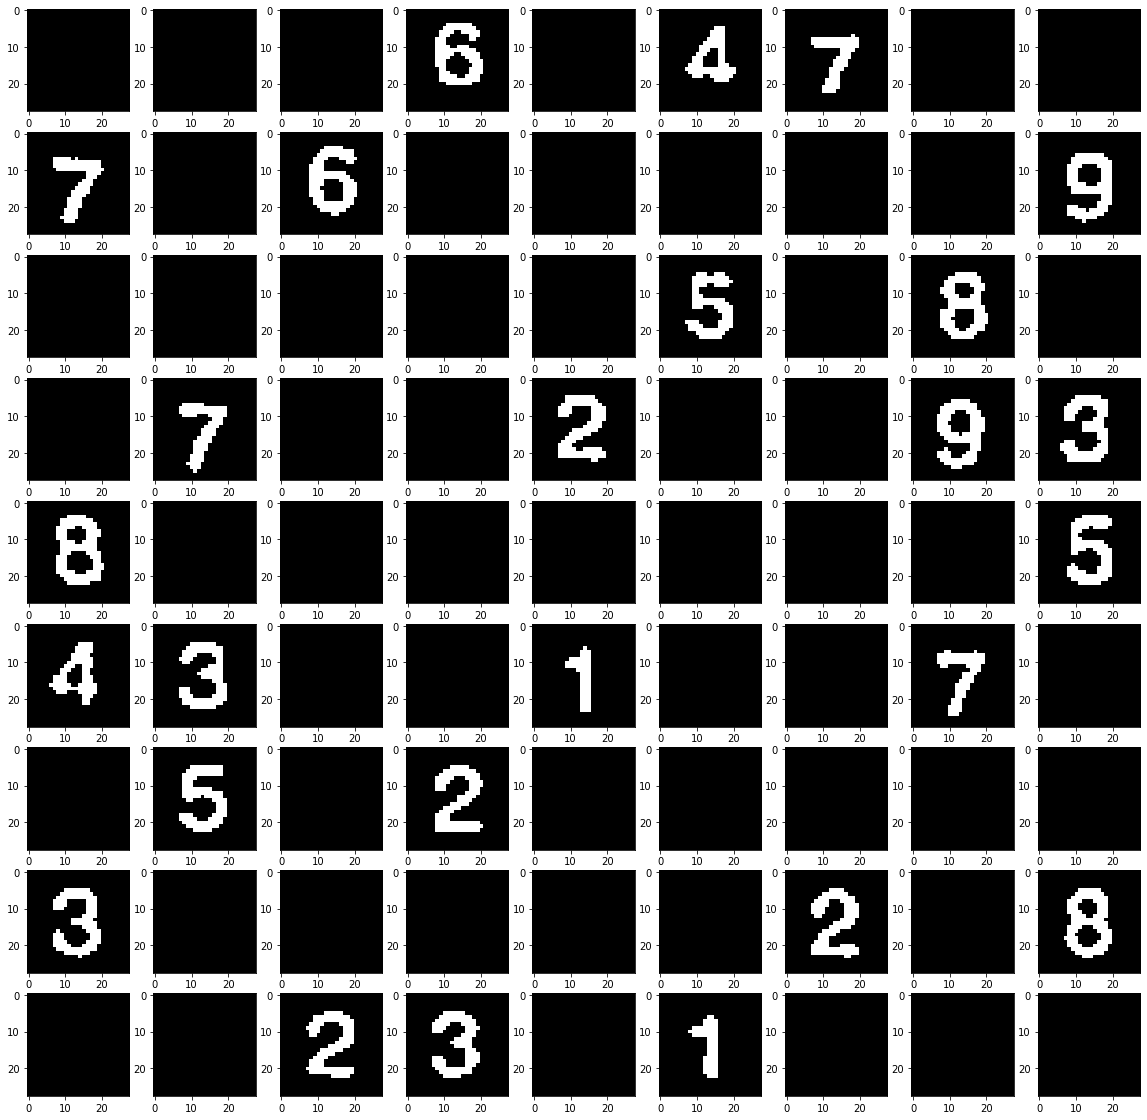

In [22]:
numbers = PreImageService("").pre_numbers()
_, ax = plt.subplots(nrows=9, ncols=9, figsize=(20, 20))
for i, row in enumerate(numbers):
    for j, number in enumerate(row):
        ax[i, j].imshow(number, cmap='gray')